### Multi class classification using PyTorch

In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as tF
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

#### Load the Data

In [63]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          shuffle=False)

#### Visualize some examples from the dataset.

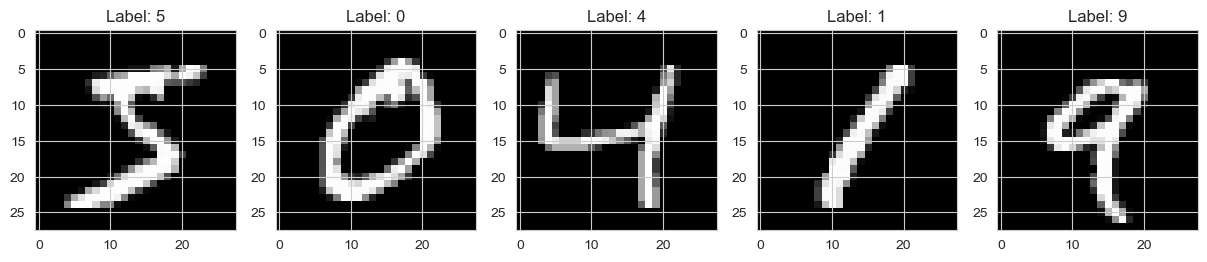

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    ax[i].imshow(train_dataset.data[i], cmap='gray')
    ax[i].set_title(f'Label: {train_dataset.targets[i]}')
plt.show()

#### Define hyperparameters

In [65]:
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#### Define the model

In [66]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)
        return out


model = LogisticRegression(input_size, num_classes)

#### Define the loss function and the optimizer

In [67]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


#### Train the model

In [68]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print('Epoch: [% d/% d], Step: [% d/% d], Loss: %.4f'
                  % (epoch + 1, num_epochs, (i + 1) // batch_size,
                     len(train_dataset) // batch_size, loss.data))

Epoch: [ 1/ 5], Step: [ 1/ 600], Loss: 2.2282
Epoch: [ 1/ 5], Step: [ 2/ 600], Loss: 2.0666
Epoch: [ 1/ 5], Step: [ 3/ 600], Loss: 2.4843
Epoch: [ 1/ 5], Step: [ 4/ 600], Loss: 2.1261
Epoch: [ 1/ 5], Step: [ 5/ 600], Loss: 1.8883
Epoch: [ 1/ 5], Step: [ 6/ 600], Loss: 0.9226
Epoch: [ 1/ 5], Step: [ 7/ 600], Loss: 1.6433
Epoch: [ 1/ 5], Step: [ 8/ 600], Loss: 1.7303
Epoch: [ 1/ 5], Step: [ 9/ 600], Loss: 1.3454
Epoch: [ 1/ 5], Step: [ 10/ 600], Loss: 2.1110
Epoch: [ 1/ 5], Step: [ 11/ 600], Loss: 1.4458
Epoch: [ 1/ 5], Step: [ 12/ 600], Loss: 2.2124
Epoch: [ 1/ 5], Step: [ 13/ 600], Loss: 1.5544
Epoch: [ 1/ 5], Step: [ 14/ 600], Loss: 1.9796
Epoch: [ 1/ 5], Step: [ 15/ 600], Loss: 1.6980
Epoch: [ 1/ 5], Step: [ 16/ 600], Loss: 1.0392
Epoch: [ 1/ 5], Step: [ 17/ 600], Loss: 1.7927
Epoch: [ 1/ 5], Step: [ 18/ 600], Loss: 0.8956
Epoch: [ 1/ 5], Step: [ 19/ 600], Loss: 1.2341
Epoch: [ 1/ 5], Step: [ 20/ 600], Loss: 1.7038
Epoch: [ 1/ 5], Step: [ 21/ 600], Loss: 1.3665
Epoch: [ 1/ 5], Step: 

#### Validate the model

In [69]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28 * 28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the model on the 10000 test images: % d %%' % (
        100 * correct / total))


Accuracy of the model on the 10000 test images:  91 %


#### The correct way to do it

[Convolutional Neural Network](https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/MNIST.ipynb)